In [2]:
# 크기 변경
import numpy as np
import cv2

def scaling(img, size):
    dst = np.zeros(size[::-1], img.dtype)
    ratioY, ratioX = np.divide(size[::-1], img.shape[:2])
    y = np.arange(0, img.shape[0], 1)
    x = np.arange(0, img.shape[1], 1)
    y, x = np.meshgrid(y,x)
    i, j = np.int32(y*ratioY), np.int32(x*ratioX)
    dst[i,j] = img[y,x]
    return dst


def bilinear_value(img,pt):
    x,y = np.int32(pt)
    if x>=img.shape[1]-1:x=x-1
    if y>=img.shape[0]-1:y=y-1
    P1, P2, P3, P4 = np.float32(img[y:y+2, x:x+2].flat)
    alpha, beta = pt[1]-y, pt[0]-x
    M1 = P1 + alpha*(P3 - P1)
    M2 = P2 + alpha*(P4 - P2)
    P = M1 + beta*(M2 - M1)
    return np.clip(P,0,255).astype(np.uint8)

def scaling_bilinear(img, size):
    ratioY, ratioX = np.divide(size[::-1], img.shape[:2])
    dst = [[bilinear_value(img, (j/ratioX, i/ratioY)) for j in range(size[0])] for i in range(size[1])]
    return np.array(dst, img.dtype)

image = cv2.imread(r"img/img.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

size = (image.shape[1]*2, image.shape[0]*2)

dst1 = scaling(image,size)
dst2 = scaling_bilinear(image,size)
cv2.imshow("image", image)
cv2.imshow("scaling - nearest", dst1)
cv2.imshow("scaling - bilinear", dst2)
cv2.waitKey(0)

-1

In [3]:
import numpy as np
import cv2

def contain(p,shape):
    return 0 <= p[0] < shape[1] and 0 <= p[1] < shape[0]

def translate(img,pt):
    dst = np.zeros(img.shape, img.dtype)
    for i in range(img.shape[0]):
        for j in range(img.shape[0]):
            x,y = np.subtract((j,i),pt)
            if contain((x,y), img.shape):
                dst[i,j] = img[y,x]
    return dst

image = cv2.imread(r"img/img.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류") 

dst1 = translate(image,(30,30))
dst2 = translate(image,(-70,70))

cv2.imshow("image", image)
cv2.imshow("translate +30,+30", dst1)
cv2.imshow("translate -70,+70", dst2)   
cv2.waitKey(0)

-1

In [5]:
import numpy as np
import cv2

def bilinear_value(img,pt):
    x,y = np.int32(pt)
    if x>=img.shape[1]-1:x=x-1
    if y>=img.shape[0]-1:y=y-1
    P1, P2, P3, P4 = np.float32(img[y:y+2, x:x+2].flat)
    alpha, beta = pt[1]-y, pt[0]-x
    M1 = P1 + alpha*(P3 - P1)
    M2 = P2 + alpha*(P4 - P2)
    P = M1 + beta*(M2 - M1)
    return np.clip(P,0,255).astype(np.uint8)

def contain(p,shape):
    return 0 <= p[0] < shape[1] and 0 <= p[1] < shape[0]

def rotate_pt(img, degree, pt):
    dst = np.zeros(img.shape[:2], img.dtype)
    radian = (degree/180)*np.pi
    sin, cos = np.sin(radian), np.cos(radian)

    for i in range(img.shape[0]):
        for j in range(int(img.shape[1])):
            jj, ii = np.subtract((j,i),pt)
            y = -jj*sin + ii*cos
            x = jj*cos + ii*sin
            x,y= np.add((x,y),pt)
            if contain((x,y), img.shape):
                dst[i,j] = bilinear_value(img, (x,y))   
    return dst

image = cv2.imread(r"img/img.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류") 


dst1 = rotate_pt(image, 30, (0,0))
center = (image.shape[1]//2, image.shape[0]//2)
dst2 = rotate_pt(image, 20, center)

cv2.imshow("image", image)
cv2.imshow("rotate +30 around (0,0)", dst1)
cv2.imshow("rotate +20 around center", dst2)
cv2.waitKey(0)

-1

In [ ]:
import numpy as np
import cv2

image = cv2.imread(r"img/img.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

sx, sy = 1.5, 0.5
M_scle = np.float32([[sx,0,0],[0,sy,0]])

tx, ty = 30, 80
M_trans = np.float32([[1,0,tx],[0,1,ty]])

center = (image.shape[1]//2, image.shape[0]//2)
angle = 30
scale = 1.0
M_rot = cv2.getRotationMatrix2D(center, angle, scale)

w,h = image.shape[1], image.shape[0]
dst1 = cv2.warpAffine(image, M_scle, (int(w*sx), int(h*sy)))
dst2 = cv2.warpAffine(image, M_trans, (w,h)) 
dst3 = cv2.warpAffine(image, M_rot, (w,h))
cv2.imshow("image", image)
cv2.imshow("scaling - cv2", dst1)
cv2.imshow("translate - cv2", dst2)
cv2.imshow("rotate - cv2", dst3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2

img = cv2.imread(r"img/img2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 1)
edges = cv2.Canny(blur, 240, 250)


lines = cv2.HoughLinesP(edges, 1, np.pi/180, 210)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)

cv2.imshow("img", img)
cv2.imshow("edges", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import numpy as np
import cv2

img = cv2.imread(r"img/img3.jpg")
if img is None: raise Exception("영상파일 읽기 오류")


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_f = np.float32(gray)

dst = cv2.cornerHarris(gray_f, 5, 3, 0.06)
threshold = 0.01 * dst.max()
corner_img = img.copy()


ys,yx = np.where(dst > threshold)

for x,y in zip(yx,ys):
    cv2.circle(corner_img, (x,y),radius=2, color=(0,255,0), thickness=-1)

cv2.imshow("img", img)
cv2.imshow("corner harris", corner_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data']
y = mnist['target'].astype(np.int32)

X = X.astype(np.float32) / 255.0  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

Matplotlib is building the font cache; this may take a moment.


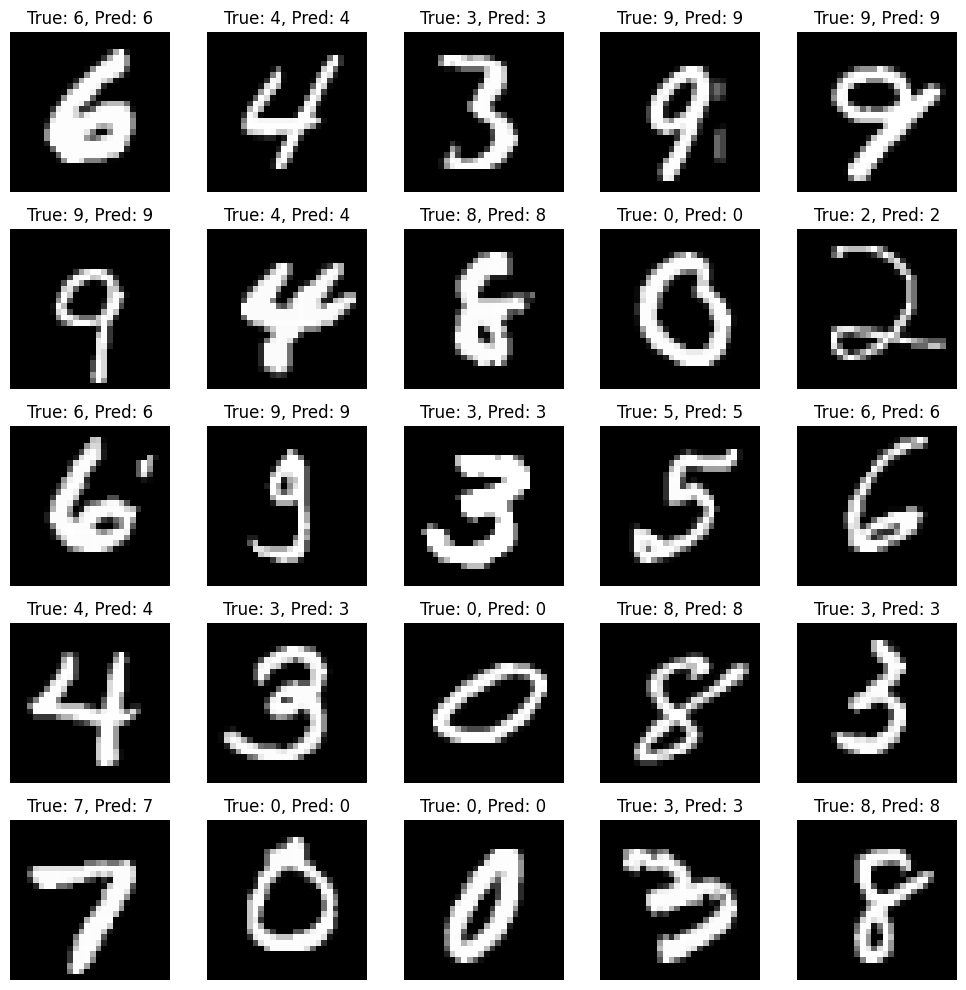

<function destroyAllWindows>

In [8]:
knn = cv2.ml.KNearest_create()
knn.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

k=5 
ret, result, neighbours, dist = knn.findNearest(X_test, k)

y_pred = result.flatten().astype(np.int32)
accuracy = (y_pred == y_test).mean()

indices = np.random.choice(len(X_test), 25, replace=False)
plt.figure(figsize=(10,10))

for i, idx in enumerate(indices):
    img = X_test[idx].reshape(28,28)
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    ax = plt.subplot(5,5,i+1)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'True: {true_label}, Pred: {pred_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()
cv2.destroyAllWindows

In [9]:
print(f"정확도 : {accuracy:.2f}%")

정확도 : 0.97%
